### Corona Virus Data Analyst 22 March 2020

Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.  

Coronaviruses are zoonotic, meaning they are transmitted between animals and people.  Detailed investigations found that SARS-CoV was transmitted from civet cats to humans and MERS-CoV from dromedary camels to humans. Several known coronaviruses are circulating in animals that have not yet infected humans. 

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

Standard recommendations to prevent infection spread include regular hand washing, covering mouth and nose when coughing and sneezing, thoroughly cooking meat and eggs. Avoid close contact with anyone showing symptoms of respiratory illness such as coughing and sneezing.

Resources : WHO

This data analysis is focused on data wrangling, data cleaning and data visulization of Corona Virus on 8th March 2020.

The dataset is derived from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE. 

Here is the link consisting of all datased regarding Coronavirus

https://github.com/CSSEGISandData/COVID-19

1 - Determine which libraries is used for dataset

In [72]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
%matplotlib inline

2 - Load data from csv file defined in the link repository

In [73]:
corona_corfirm_file = "time_series_19-covid-Confirmed.csv"
corona_deaths_file = "time_series_19-covid-Deaths.csv"
corona_recovered_file = "time_series_19-covid-Recovered.csv"
dataset_date = "03-21-2020.csv"

url_daily = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' 

url_time = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'

corona_data_daily_df = pd.read_csv(url_daily + dataset_date, error_bad_lines=False,encoding = "utf-8")
corona_corfirm_time_data_df = pd.read_csv(url_time + corona_corfirm_file, error_bad_lines=False,encoding = "utf-8")
corona_deaths_time_data_df = pd.read_csv(url_time + corona_deaths_file, error_bad_lines=False,encoding = "utf-8")
corona_recovered_time_data_df = pd.read_csv(url_time + corona_recovered_file , error_bad_lines=False,encoding = "utf-8")

3 - Determine how many people were confirmed,recovered and dead from Corona Virus in terms of their countries

In [74]:
corona_data_df_daily_corfirmed = corona_data_daily_df.groupby(['Country/Region'])['Confirmed'].sum()
corona_data_df_daily_deaths = corona_data_daily_df.groupby(['Country/Region'])['Deaths'].sum()
corona_data_df_daily_recovered = corona_data_daily_df.groupby(['Country/Region'])['Recovered'].sum()

4 - Determine which 7 most-affected countries or regions were confirmed,recovered and dead from Corona Virus cases

In [75]:
df_confirmed = corona_data_df_daily_corfirmed.sort_values(ascending=False).head(7).reset_index()
df_deaths = corona_data_df_daily_deaths.sort_values(ascending=False).head(7).reset_index()
df_recovered = corona_data_df_daily_recovered.sort_values(ascending=False).head(7).reset_index()

5 - Sum Values in terms of Country Region in corfirm,deaths and lastly recovered dataframes.

In [76]:
corona_corfirm_time_data_df = corona_corfirm_time_data_df.groupby(['Country/Region']).sum().reset_index()
corona_death_time_data_df = corona_deaths_data_df.groupby(['Country/Region']).sum().reset_index()
corona_recovered_time_data_df = corona_recovered_data_df.groupby(['Country/Region']).sum().reset_index()

6 - Remove both Lat and Long columns from all these dataframes

In [77]:
corona_corfirm_time_data_df.drop(['Lat', 'Long'], axis=1, inplace=True)
corona_death_time_data_df.drop(['Lat', 'Long'], axis=1, inplace=True)
corona_recovered_time_data_df.drop(['Lat', 'Long'], axis=1, inplace=True)

7 - Convert Country/Region to Country

In [78]:
corona_corfirm_time_data_df.rename(columns={'Country/Region': 'Country'}, inplace=True)
corona_death_time_data_df.rename(columns={'Country/Region': 'Country'}, inplace=True)
corona_recovered_time_data_df.rename(columns={'Country/Region': 'Country'}, inplace=True)

8 - Write a query to get some countries

In [79]:
corona_corfirm_time_data_df = corona_corfirm_time_data_df.query('Country == "US" or Country == "Canada" or Country == "Italy" or Country == "Turkey" or Country == "China" or Country == "Iran" or Country == "Australia" or Country == "Russia" or Country == "Germany" or Country == "UK" or Country == "United Kingdom" or Country == "Spain" or Country == "France"')
corona_death_time_data_df = corona_death_time_data_df.query('Country == "US" or Country == "Canada" or Country == "Italy" or Country == "Turkey" or Country == "China" or Country == "Iran" or Country == "Australia" or Country == "Russia" or Country == "Germany" or Country == "UK" or Country == "United Kingdom" or Country == "Spain" or Country == "France"')
corona_recovered_time_data_df = corona_recovered_time_data_df.query('Country == "US" or Country == "Canada" or Country == "Italy" or Country == "Turkey" or Country == "China" or Country == "Iran" or Country == "Australia" or Country == "Russia" or Country == "Germany" or Country == "UK" or Country == "United Kingdom" or Country == "Spain" or Country == "France"')

9 - Convert date columns to datetime columns

In [80]:
corona_corfirm_time_data_df.columns = corona_corfirm_time_data_df.columns[:1].tolist() + pd.to_datetime(corona_corfirm_time_data_df.columns[1:]).date.tolist()
corona_death_time_data_df.columns = corona_death_time_data_df.columns[:1].tolist() + pd.to_datetime(corona_death_time_data_df.columns[1:]).date.tolist()
corona_recovered_time_data_df.columns = corona_recovered_time_data_df.columns[:1].tolist() + pd.to_datetime(corona_recovered_time_data_df.columns[1:]).date.tolist()

10 - Write a function for melting all dataframes to visualize computer-family structure

In [81]:
def meltDataFrame(df,id_vars,value_vars,var_name,value_name):
    return pd.melt(df,
        id_vars= id_vars,
        value_vars = value_vars,
        var_name= var_name,
        value_name= value_name)

In [82]:
corona_corfirm_time_data_df_melt = meltDataFrame(corona_corfirm_time_data_df.reset_index(),
        ['Country'],pd.date_range('3/16/20', '3/21/20', freq='D').date,'Date','Total_Corfirmed')

corona_death_time_data_df_melt = meltDataFrame(corona_death_time_data_df.reset_index(),
        ['Country'],pd.date_range('3/16/20', '3/21/20', freq='D').date,'Date','Total_Death')

corona_recovered_time_data_df_melt = meltDataFrame(corona_recovered_time_data_df.reset_index(),
        ['Country'],pd.date_range('3/16/20', '3/21/20', freq='D').date,'Date','Total_Recovered')

11 - Write a function for merging all dataframe in terms of Country and Date

In [83]:
def mergeDataFrame(df_melt_1,df_melt_2,how,left_on,right_on):
    return pd.merge(df_melt_1, 
                    df_melt_2,  
                    how=how, 
                    left_on=left_on, 
                    right_on = right_on)

corona_df = mergeDataFrame(corona_corfirm_time_data_df_melt, 
                    corona_death_time_data_df_melt,  
                    'left', 
                    ['Country','Date'], 
                    ['Country','Date'])


corona_df = mergeDataFrame(corona_df, 
                    corona_recovered_time_data_df_melt,  
                    'left', 
                    ['Country','Date'], 
                    ['Country','Date'])

corona_df.rename(columns={'Date': 'Day_Date'}, inplace=True)

12 - Show a figure regarding how many people were confirmed,recovered and dead from Corona Virus in 7 most-affected countries or regions

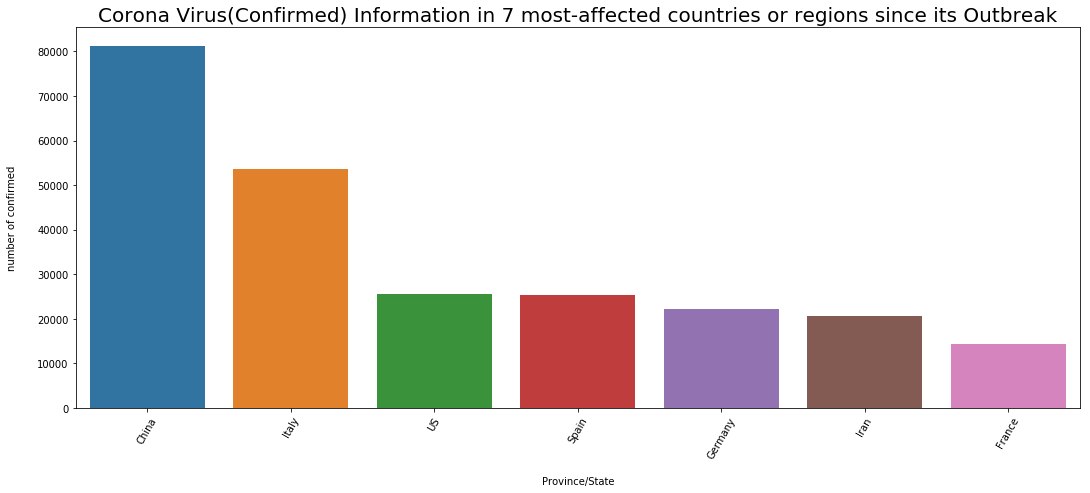

In [84]:
plt.figure(figsize=(18,7))
sns.barplot(x="Country/Region", y="Confirmed" ,
            data = df_confirmed )
plt.title('Corona Virus(Confirmed) Information in 7 most-affected countries or regions since its Outbreak', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('images/image1.png')
plt.savefig('images/image1.pdf')

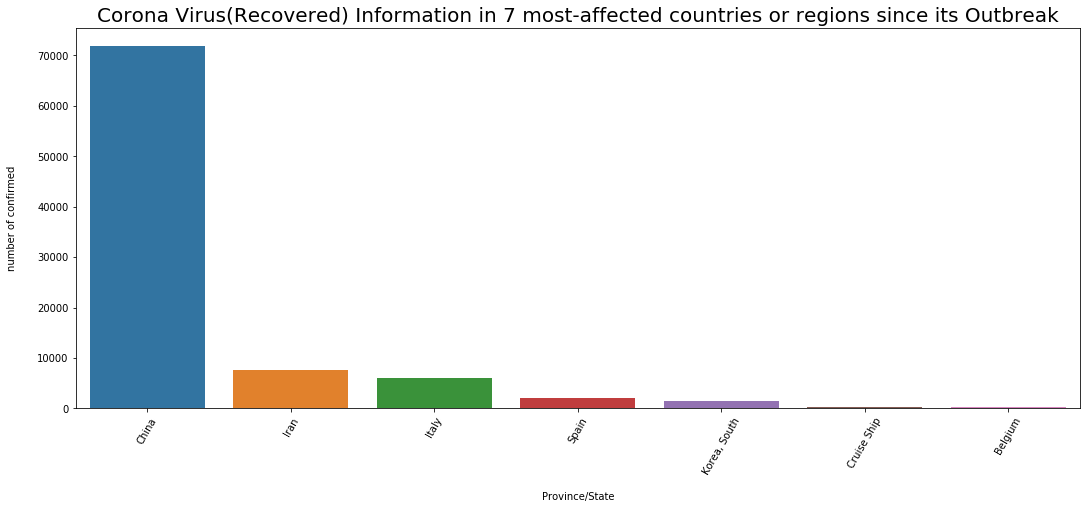

In [85]:
plt.figure(figsize=(18,7))
sns.barplot(x="Country/Region", y="Recovered" ,
            data = df_recovered )
plt.title('Corona Virus(Recovered) Information in 7 most-affected countries or regions since its Outbreak', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('images/image2.png')
plt.savefig('images/image2.pdf')

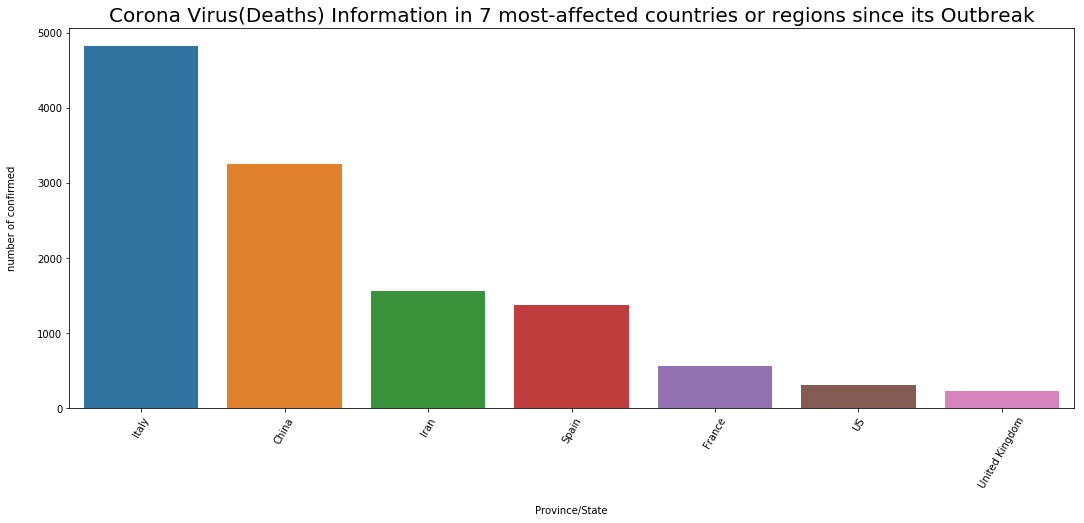

In [86]:
plt.figure(figsize=(18,7))
sns.barplot(x="Country/Region", y="Deaths" ,
            data = df_deaths )
plt.title('Corona Virus(Deaths) Information in 7 most-affected countries or regions since its Outbreak', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('images/image3.png')
plt.savefig('images/image3.pdf')

13 - Show a figure the total number of Confirmed, Recovered and Deaths since its outbreak 

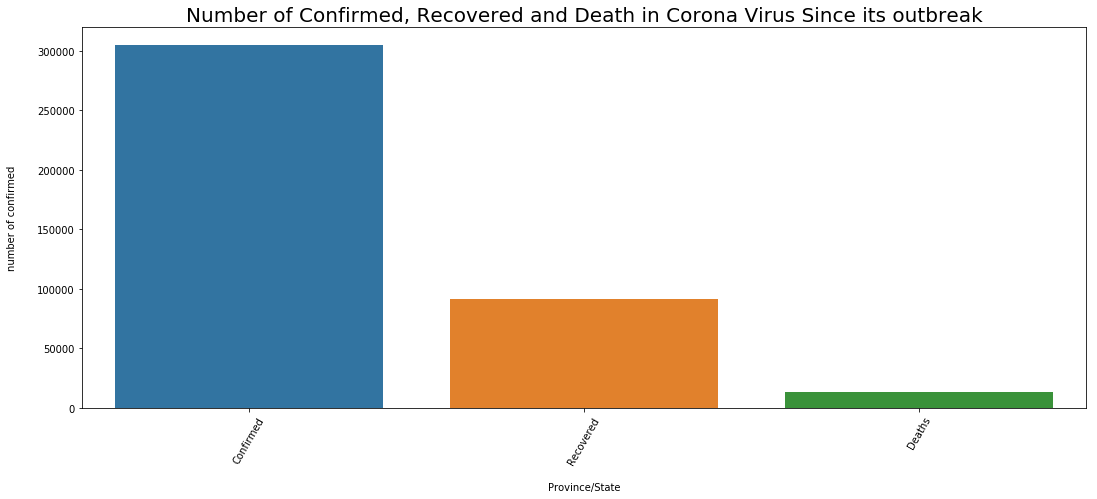

In [87]:
corona_data_df_total = corona_data_daily_df[['Confirmed','Recovered','Deaths']].sum()
corona_data_df_total = corona_data_df_total.reset_index()

plt.figure(figsize=(18,7))
sns.barplot(x = "index", y = 0,  
            data = corona_data_df_total )
plt.title('Number of Confirmed, Recovered and Death in Corona Virus Since its outbreak', fontsize=20, y=1)
plt.xlabel('Province/State', labelpad=16)
plt.ylabel('number of confirmed', labelpad=20)
plt.xticks(rotation=60);
plt.savefig('images/image4.png')
plt.savefig('images/image4.pdf')

14 - Show figures the overview of last 5 days about Corona Virus in terms of Confirmed , Recovered and Death

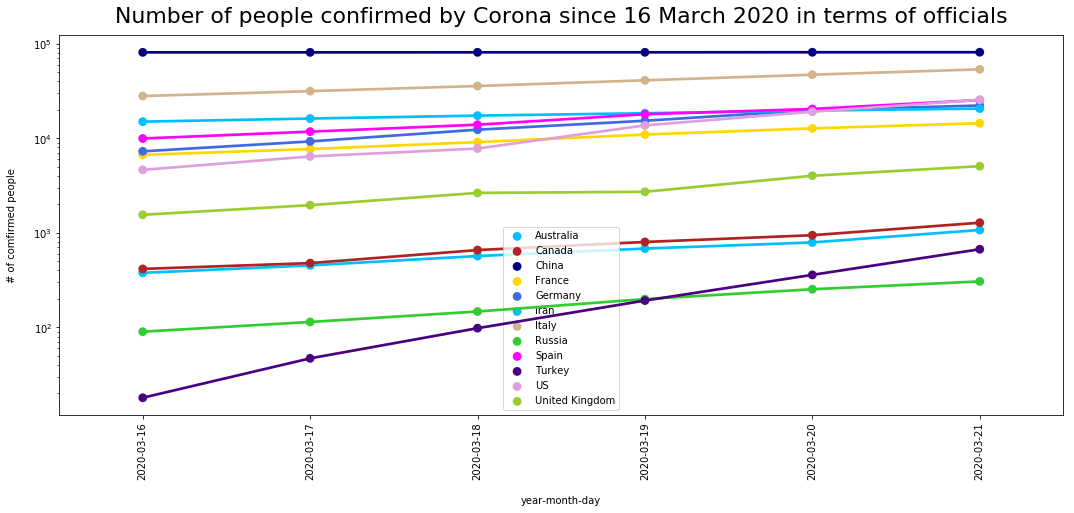

In [88]:
plt.figure(figsize=(18,7))

my_palette = {'China':'navy', 
              'Australia':'deepskyblue',
              'Canada':'firebrick',
              'Italy':'tan',
              'France':'gold',
              'Germany':'royalblue',
              'US':'plum',
              'United Kingdom':'yellowgreen',
              'Spain':'fuchsia',
              'Iran':'deepskyblue',
              'Russia':'limegreen',
              'Turkey':'indigo'
             }

ax = sns.pointplot(data = corona_df, x='Day_Date', y='Total_Corfirmed', hue='Country', palette= my_palette)
plt.title('Number of people confirmed by Corona since 16 March 2020 in terms of officials', fontsize=22, y=1.015)
plt.xlabel('year-month-day', labelpad=16)
plt.ylabel('# of comfirmed people', labelpad=16)
leg = ax.legend()
ax.set_yscale('log')
plt.xticks(rotation=90);
plt.savefig('images/image5.png')
plt.savefig('images/image5.pdf')

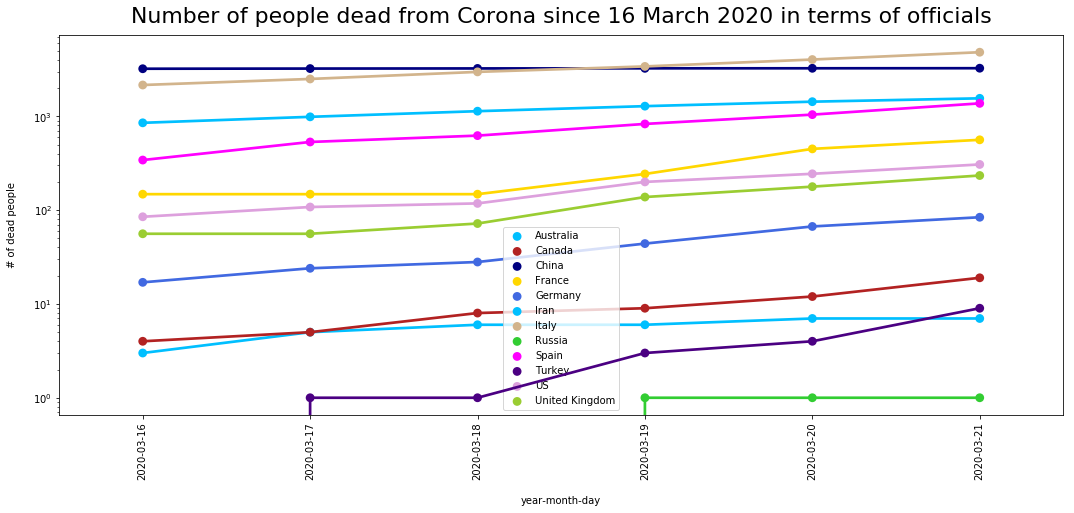

In [89]:
plt.figure(figsize=(18,7))

my_palette = {'China':'navy', 
              'Australia':'deepskyblue',
              'Canada':'firebrick',
              'Italy':'tan',
              'France':'gold',
              'Germany':'royalblue',
              'US':'plum',
              'United Kingdom':'yellowgreen',
              'Spain':'fuchsia',
              'Iran':'deepskyblue',
              'Russia':'limegreen',
              'Turkey':'indigo'
             }

ax = sns.pointplot(data = corona_df, x='Day_Date', y='Total_Death', hue='Country', palette= my_palette)
plt.title('Number of people dead from Corona since 16 March 2020 in terms of officials', fontsize=22, y=1.015)
plt.xlabel('year-month-day', labelpad=16)
plt.ylabel('# of dead people', labelpad=16)
leg = ax.legend()
ax.set_yscale('log')
plt.xticks(rotation=90);
plt.savefig('images/image6.png')
plt.savefig('images/image6.pdf')

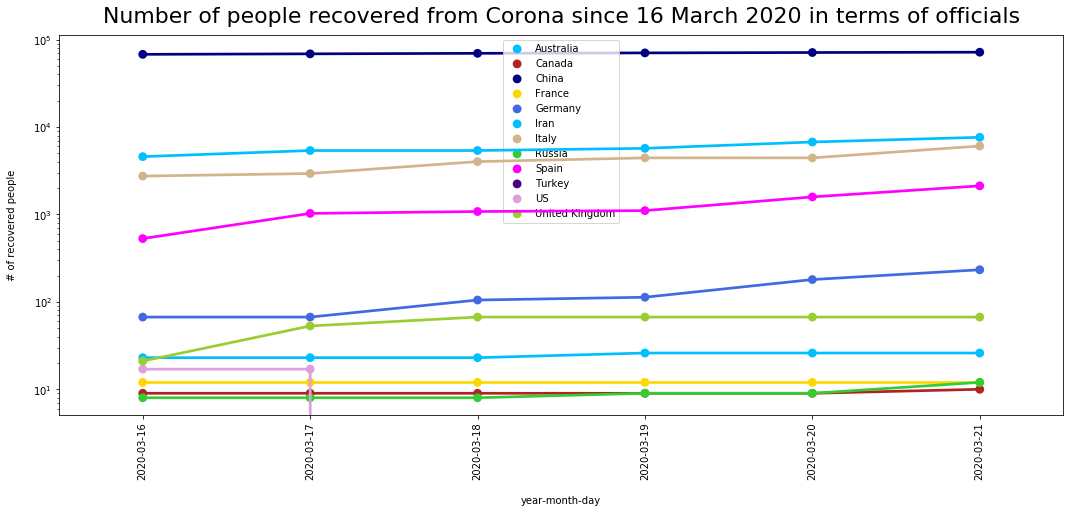

In [90]:
plt.figure(figsize=(18,7))

my_palette = {'China':'navy', 
              'Australia':'deepskyblue',
              'Canada':'firebrick',
              'Italy':'tan',
              'France':'gold',
              'Germany':'royalblue',
              'US':'plum',
              'United Kingdom':'yellowgreen',
              'Spain':'fuchsia',
              'Iran':'deepskyblue',
              'Russia':'limegreen',
              'Turkey':'indigo'
             }

ax = sns.pointplot(data = corona_df, x='Day_Date', y='Total_Recovered', hue='Country', palette= my_palette)
plt.title('Number of people recovered from Corona since 16 March 2020 in terms of officials', fontsize=22, y=1.015)
plt.xlabel('year-month-day', labelpad=16)
plt.ylabel('# of recovered people', labelpad=16)
leg = ax.legend()
ax.set_yscale('log')
plt.xticks(rotation=90);
plt.savefig('images/image7.png')
plt.savefig('images/image7.pdf')